In [3]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages

# make the screen bigger!
from IPython.display import display, HTML
display(HTML(data=""" <style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; } </style> """))


# Home path for all analysis, change only this if moved to a new computer

homedir = (r"C:\Users\cshuler\Desktop\GitHub\Tutuila_SWB2\Tutuila\Scripts\Rainfall_processing\Rain_data_files_process\Ito_rain_data")
os.chdir(homedir)


# paths for files to come from or go to, change based on each computer
path_raw_raindata = ("raw_data\Rain_data")



In [4]:
os.chdir(homedir)
os.chdir(path_raw_raindata)

Rfiles = os.listdir() # make a list of all the files in the directory

Rdata = {}    #empty dictionary that will house all the files

for i in Rfiles:    
    x = pd.read_csv(i)   # read each file
    
    key_name = i.split("_")[0] # name it as the first date
    
    Rdata[key_name] = x      # make the dataframe key the first date name
    
Rframe_list = list(Rdata.keys())   # the list of all the keys

In [7]:
os.chdir(homedir)

date_list = Rdata[Rframe_list[0]][['Date']].copy()

for i in  Rframe_list:
    nextup = Rdata[i][['Date', 'Rain_[in]']].copy()
    nextup.columns = ['Date', i+'_rain[in]']          # name the columns proper
    date_list = date_list.merge(nextup, how='outer', on='Date')  #stick em together


<IPython.core.display.Javascript object>


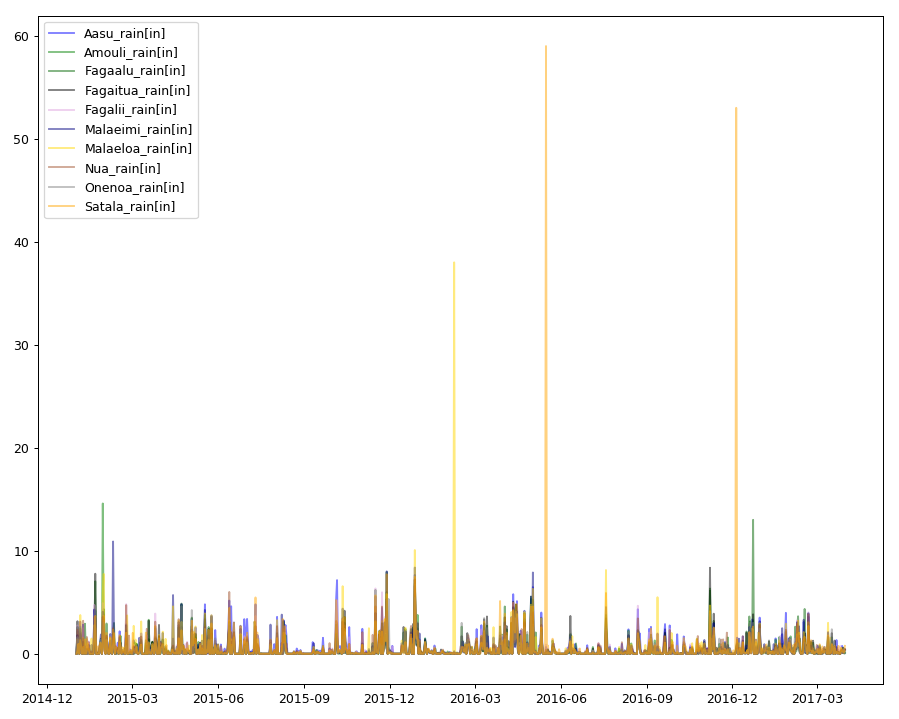

In [8]:
# this plots all the stations on one graph 

%matplotlib notebook

date_list['Date'] = pd.to_datetime(date_list['Date'], errors='coerce')

station_list = list(date_list.keys())
station_list = station_list[1:]
n = len(station_list)
x = 0


Color = ["red", "blue", "green", "darkgreen", "black", "plum", "navy", "gold", "sienna", "gray", "orange"]

fig = plt.figure(figsize=(10, 8))
for i in station_list:
    x = x+1
    #fig.add_subplot(n,1,x)
    plt.plot(date_list['Date'], date_list[i], C=Color[x], alpha=0.5)
    fig.tight_layout()

plt.legend(loc='upper left')


<IPython.core.display.Javascript object>


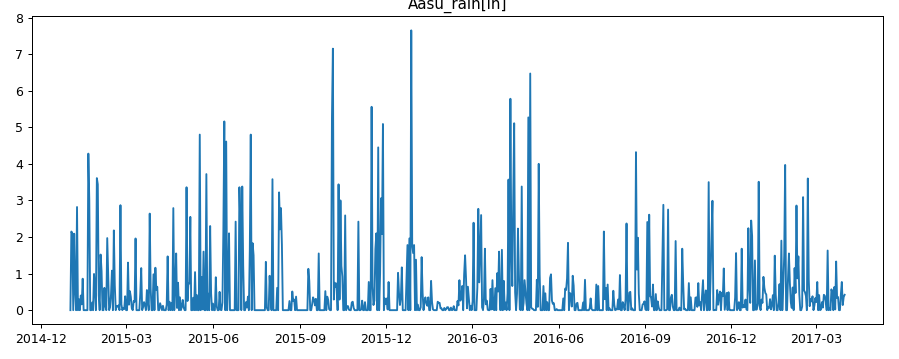

<IPython.core.display.Javascript object>


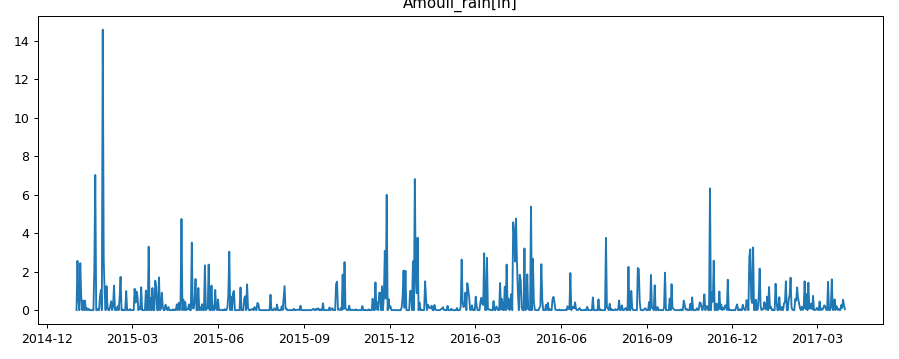

<IPython.core.display.Javascript object>


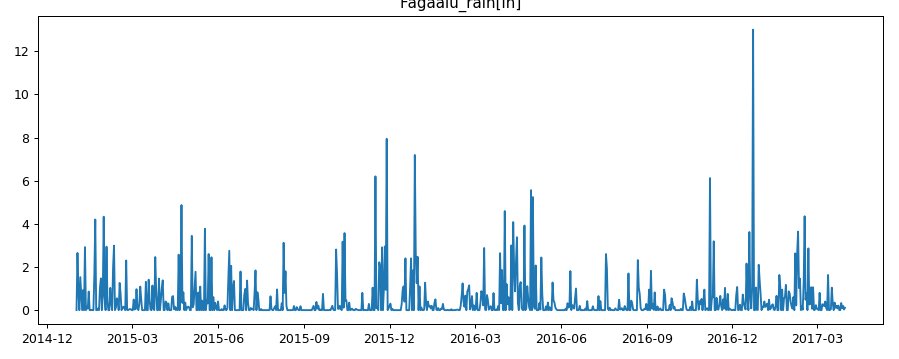

<IPython.core.display.Javascript object>


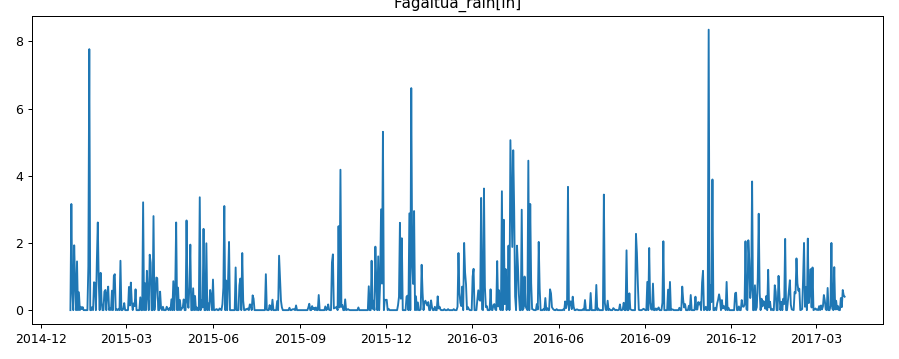

<IPython.core.display.Javascript object>


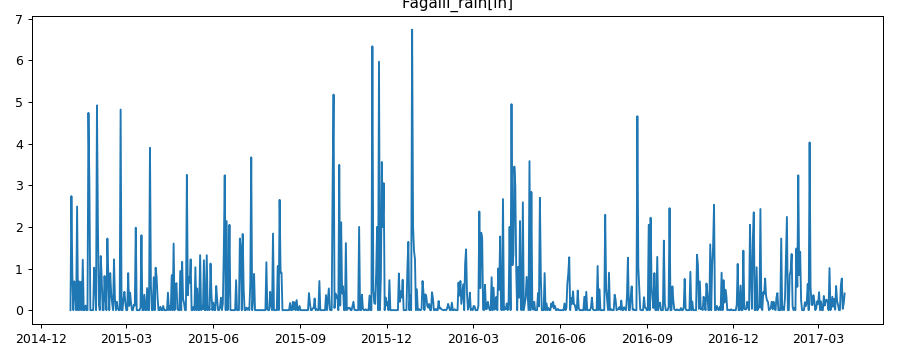

<IPython.core.display.Javascript object>


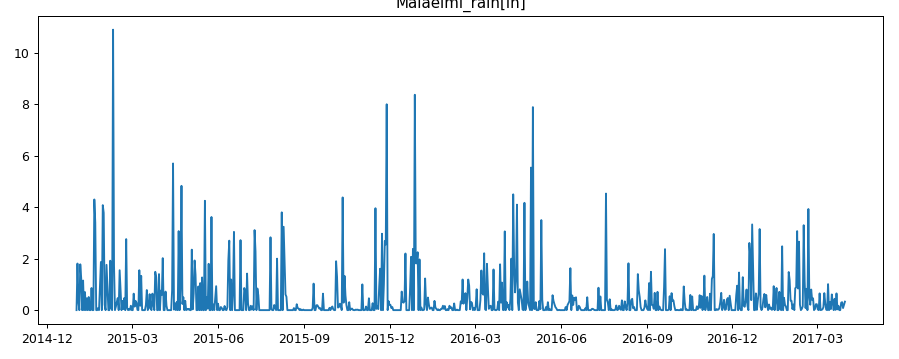

<IPython.core.display.Javascript object>


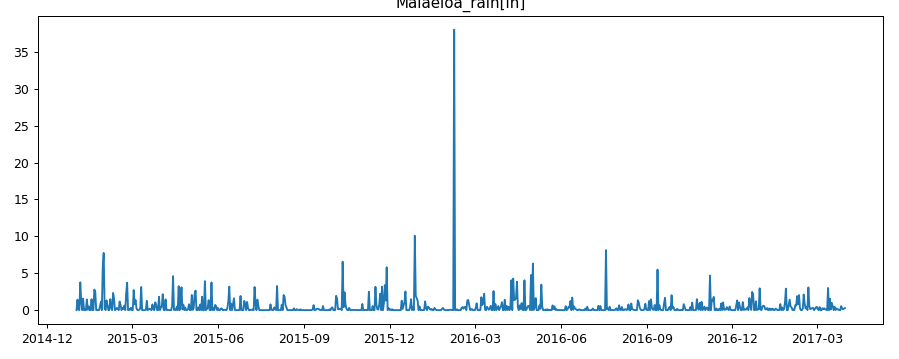

<IPython.core.display.Javascript object>


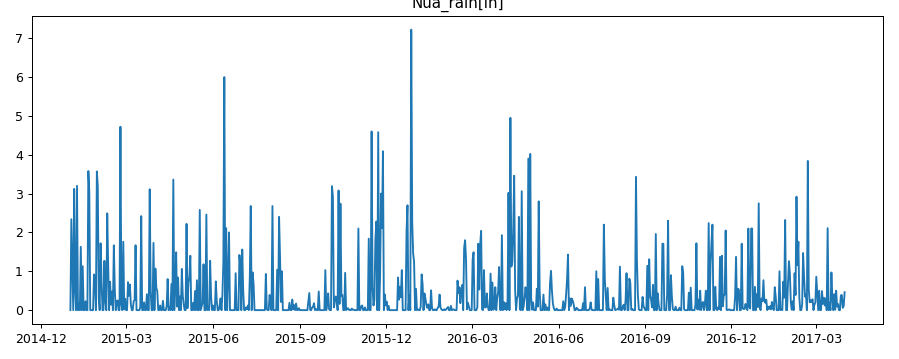

<IPython.core.display.Javascript object>


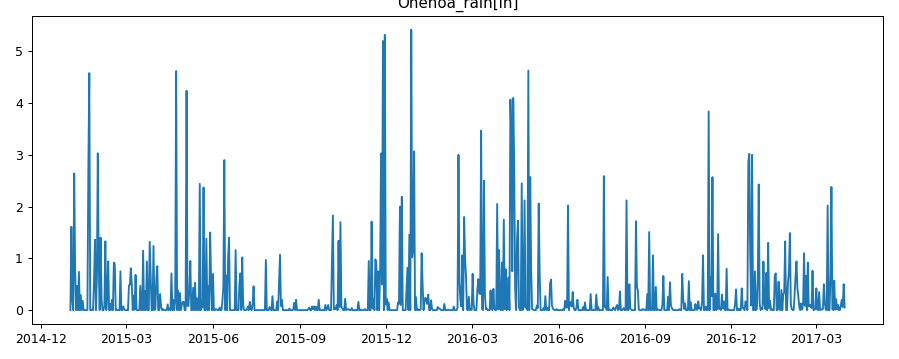

<IPython.core.display.Javascript object>


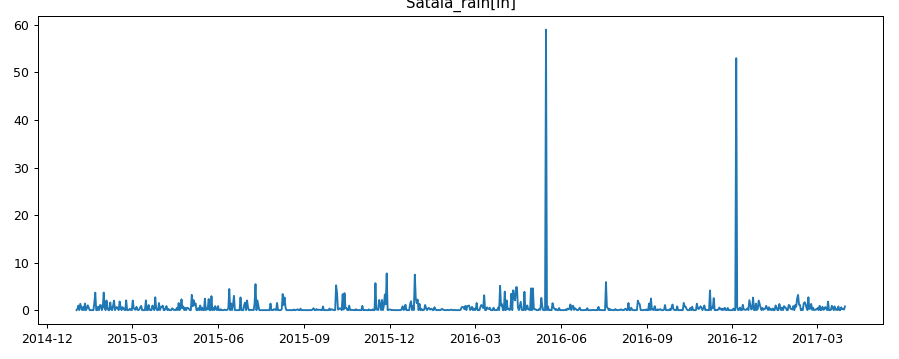

In [10]:
# this plots each station on its own separate interactive figure 

date_list['Date'] = pd.to_datetime(date_list['Date'], errors='coerce')

station_list = list(date_list.keys())
station_list = station_list[1:]
n = len(station_list)


   
%matplotlib notebook
x = 0
for i in station_list:
    fig = plt.figure(figsize=(10, 4))
    x = x+1
    plt.plot(date_list['Date'], date_list[i])
    fig.tight_layout()
    plt.title(i)


<IPython.core.display.Javascript object>


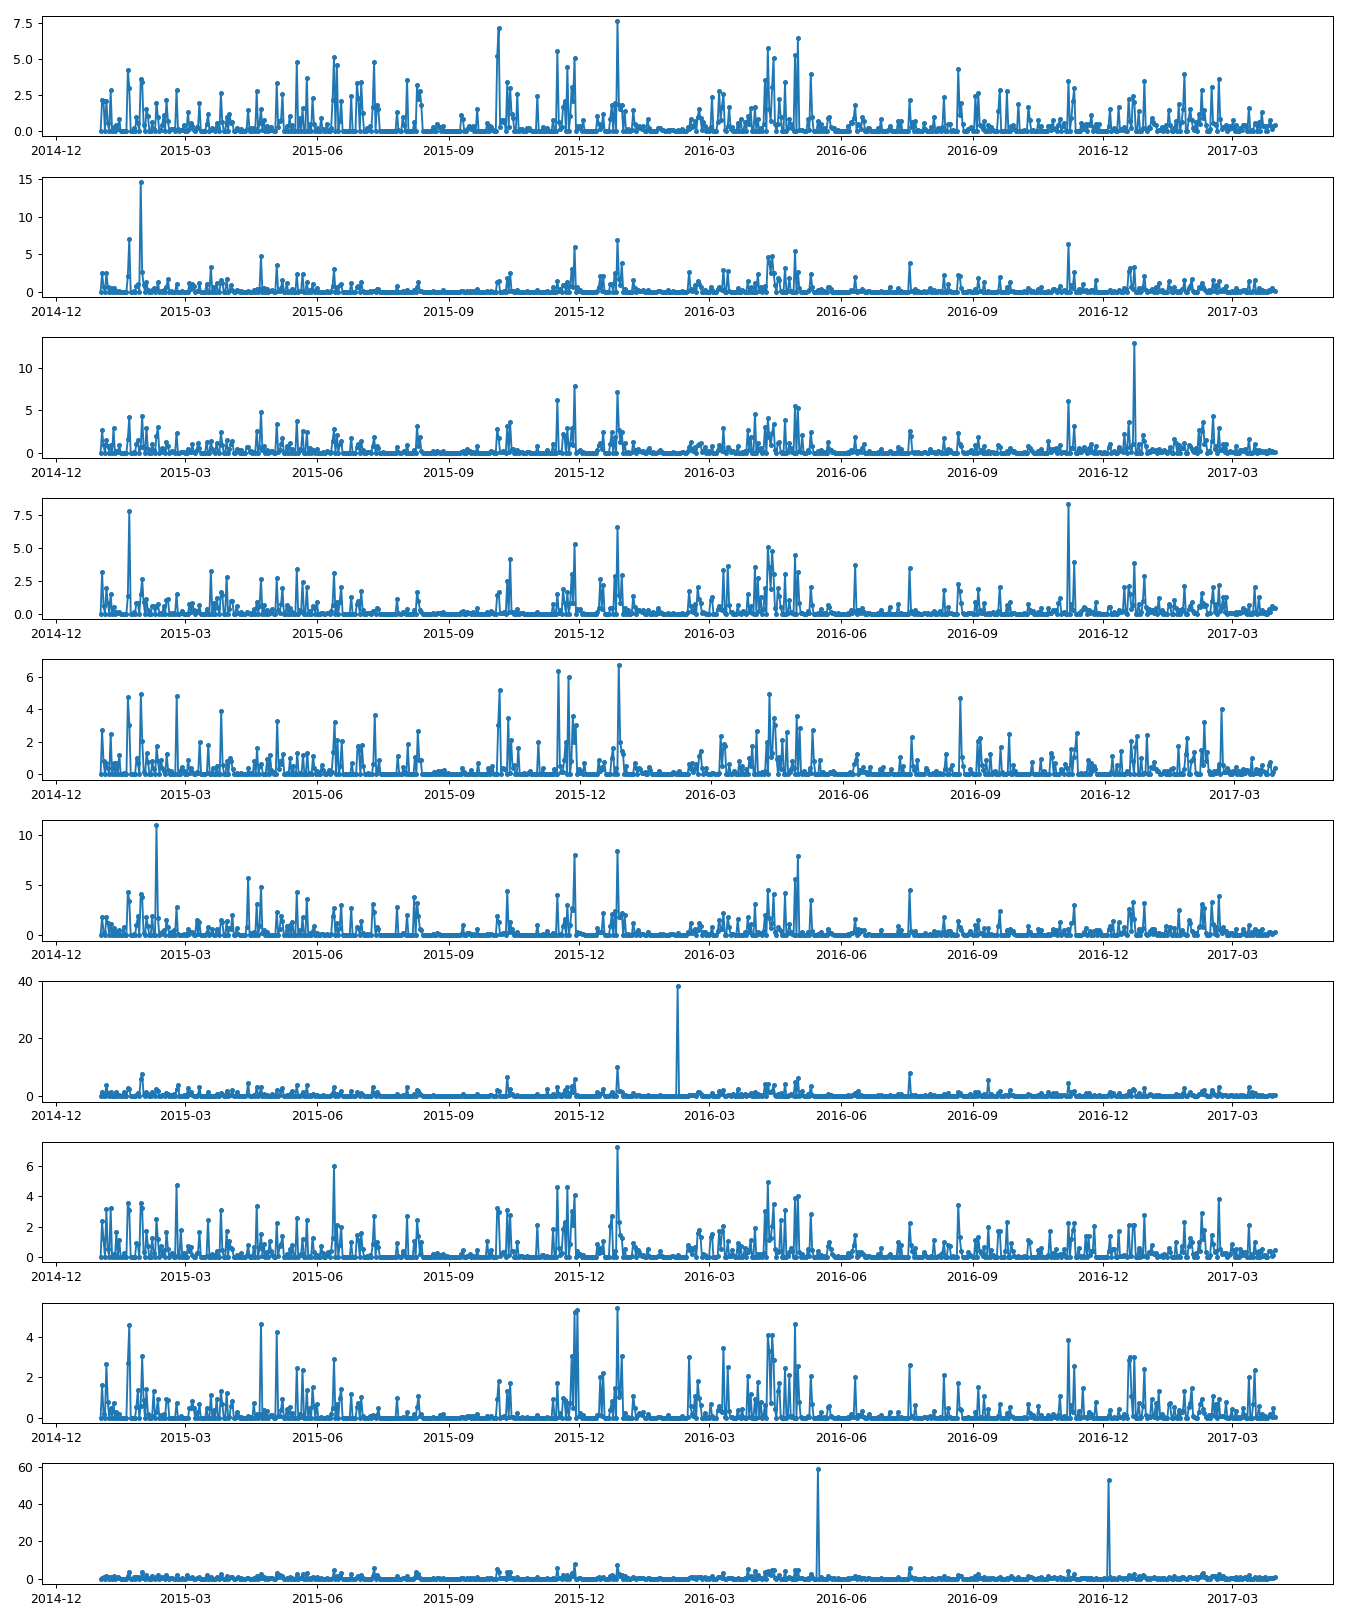

In [11]:
# this sub plots all the stations on a bunc of little interactive graphs  

%matplotlib notebook
date_list['Date'] = pd.to_datetime(date_list['Date'], errors='coerce')

station_list = list(date_list.keys())
station_list = station_list[1:]
n = len(station_list)
x = 0

fig = plt.figure(figsize=(15, 18))
for i in station_list:
    x = x+1
    fig.add_subplot(n,1,x)
    plt.plot(date_list['Date'], date_list[i], marker='.')
    fig.tight_layout()
   

# import the airport data

In [13]:
os.chdir(homedir)

airport = pd.read_csv('raw_data/Airport_rainfall.csv')
airport['Date'] = pd.to_datetime(airport['Date'], errors='coerce')  # string date to real date
airport = airport.dropna(subset = ['Date'], axis=0, how='any') # remove entries with messed up dates
airport = airport.replace(' ', '') # delete any  eronious spaces in the data
airport = airport.replace('', '0') # Convert any blanks to 0s in the data
airport['PPG_rain[in]'] = airport['Precip'].apply(lambda x: float(x))
del airport['Precip']

### Merge airport and stations

In [14]:
date_list = date_list.merge(airport, how='outer', on='Date')  #stick em together

### Correct stupid Outlier values in the Ito data

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<IPython.core.display.Javascript object>


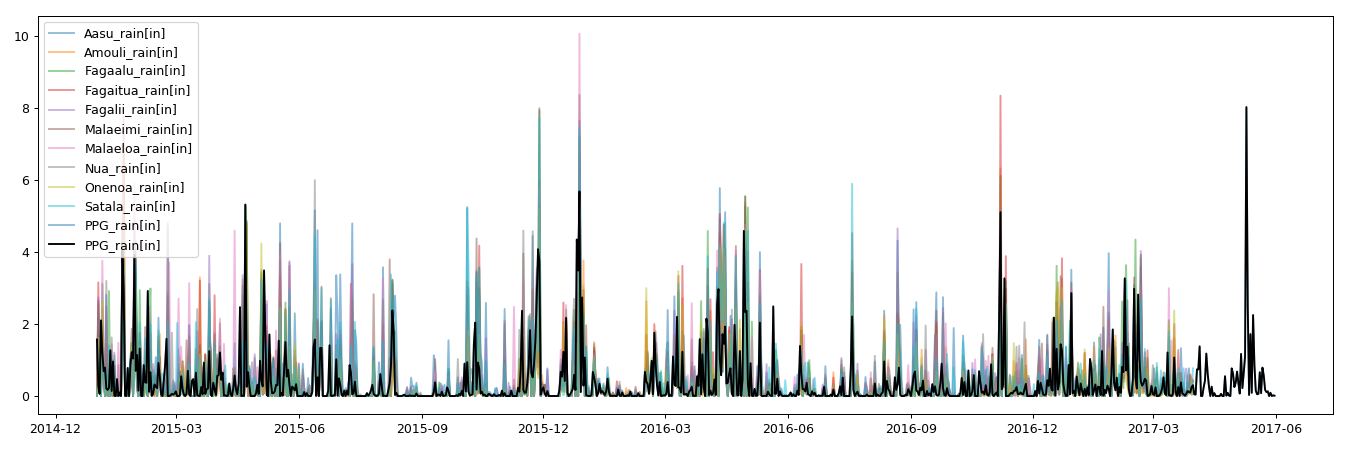

In [17]:
corrected_date_list = date_list.copy()
# create a dataframe of the 
anomoly_list = date_list[['Date', 'PPG_rain[in]']].copy()
for i in station_list:
    anomoly_num = abs(date_list[i] - date_list['PPG_rain[in]'])
    booli = anomoly_num > 5
    corrected_date_list[i][booli] = date_list['PPG_rain[in]']
    

fig = plt.figure(figsize=(15, 5))
for i in corrected_date_list.columns[1:]:
    plt.plot(corrected_date_list['Date'], corrected_date_list[i], alpha=0.5)
    fig.tight_layout()
plt.plot(date_list['Date'], date_list['PPG_rain[in]'], alpha=1, color = 'k')
plt.legend(loc='upper left')

corrected_date_list.to_csv(r'C:\Users\cshuler\Desktop\GitHub\Tutuila_SWB2\Tutuila\Scripts\Rainfall_processing\Rain_data_files_process\Ito_rain_data\Corrected_ito_rain_data.csv')